# Notebook 1A:  k-Nearest Neighbor (kNN) Classification
Organized and prepared by Christopher Monterola, updated by Kenneth Co.

This notebook was conceptualized, organized, and primarily prepared for the **Machine Learning** course.

### This notebook uses the following references:
- Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017
- https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

## Introduction

There are two major types of supervised learning problems:
- **Classification** when the goal is to predict a class label, which is a choice from a predefined list of possibilities
- **Regression** when the goal is to predict a continuous number, or a floating-point number (data scientists, computer scientist) or real number (mathematician).

----

The kNN classifier is a ***non-parametric*** and *instance-based* learning algorithm.
- ***Non-parametric*** means it makes no explicit assumptions about the functional form of the mapping, avoiding the dangers of mismodeling the underlying distribution of the data. For example, suppose our data is highly non-Gaussian but the learning model we choose assumes a Gaussian form. In that case, our algorithm would make extremely poor predictions.
- ***Instance-based*** learning means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only when a query to our database is made (i.e. when we ask it to predict a label given an input),  the algorithm will use the training instances to spit out an answer.

In [2]:
# !pip install -U mglearn
# !pip install --upgrade joblib==1.1.0

## Formulation

Consider a training set with $N$ samples given by {$X_1, X_2, \ldots, X_N$} with the corresponding targets {$y_1, y_2, \ldots, y_N$}, where each of the ${X_i}$ data set contains $M$ features, for example:
- for i = 1: {$X_1$} ={$x_1^a, x_1^b, \ldots, x_1^M$} with target $y_1$
- for i = 2: {$X_2$} ={$x_2^a, x_2^b, \ldots, x_2^M$} with target $y_2$, ...
- for i = N: {$X_N$} ={$x_N^a, x_N^b, \ldots, x_N^M$} with target $y_N$

then the  target of a given feature set $q$ {$x_q^a, x_q^b, \dots, x_q^M$},chosen from 1 to $N$,  is the $y_i$ that gives the smallest euclidean distance $d_q^i$ from feature set $i$ {$x_i^a, x_i^b, \dots, x_i^M$}

\begin{equation}
d_q^i= \sqrt{(x_i^a-x_q^a)^2 + (x_i^b-x_q^b)^2 + \ldots + (x_i^M-x_q^M)^2}
\end{equation}

Don't worry if this is confusing now! You will better appreciate the above math by considering the illustration in the succeeding section.

We can generalize the above by considering $k$ neighbors such that the target of a given feature {$x_q^a$, $x_q^b$, $\dots$, $x_q^M$} is:    
1. the **mode** of the state ${y_i}$ based on the k-th nearest neighbor (collection of $k$ smallest euclidean distances $d_q^i$) and,   
2. in case of a tied number of states, the *state with the highest population* in  the training set is prioritized. If population is equal, then the *state that appears first* in the training set is prioritized. Note that these are arbitrary rules in `sklearn`.

The number of nearest neighbors is coded as `n_neighbors` in Python's `scikit-learn` library and is the most critical parameter for a kNN-based classifier.                     

In general, the distance is computed using Minkowski distance given by:

\begin{equation}
d_q= \left(\left|(x_i^a-x_q^a)^p + (x_i^b-x_q^b)^p + \ldots + (x_i^M-x_q^M)^p \right| \right)^{1/p}
\end{equation}

where $d_q$ is known as Manhattan for $p=1$, Euclidean for $p=2$ (default), and Chebyshev distance for $p \rightarrow \infty$.    

To know more about how distances are typically calculated, here is an excellent and concise reference: https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa.

## Illustration

To visually illustrate kNN let's use an example of a synthetic two-class classification dataset, the forge dataset, which has two features. The data set available in the $mglearn$ library, you have the list of two features each for sample $i$ given by {$X_i$}={$x_i^a, x_i^b$} and the list of the corresponding $y_i$. Below is a scatter plot visualizing all of the data points in this dataset. The plot has the first feature on the x-axis and the second feature on the y-axis.

As is always the case in in scatter plots, each data point is represented as one dot. The color of the dot indicates its class, with <font color='red'>red/orange</font> meaning class <font color='red'> 0 </font> and <font color='blue'>blue </font> meaning class <font color='blue'>1</font>. Unfortunately $mglearn$ is not part of the standard python packages in Google Colab hence we first need to install it.

In [3]:
# !pip install --upgrade joblib==1.1.0

In [4]:
# !pip install mglearn

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# generate dataset
X, y = mglearn.datasets.make_forge()

print("Data Set:{}".format(mglearn.datasets.make_forge()))

Data Set:(array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]]), array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
     

In [7]:
print("The element of the first feature is given by: {}".format(X[:, 0]))
print("The element of the second feature is given by: {}".format(X[:, 1]))
print("The element of the target feature is given by: {}".format(y))

The element of the first feature is given by: [ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863
 11.93027136  9.67284681  8.34810316  8.67494727  9.17748385 10.24028948
  8.68937095  8.92229526  9.49123469  9.25694192  7.99815287  8.18378052
  8.7337095   9.32298256 10.06393839  9.50048972  8.34468785  9.50169345
  9.15072323 11.563957  ]
The element of the second feature is given by: [ 4.59676542 -0.16816717  5.21116083  1.54322016  4.28695977  4.80623966
  4.64866327 -0.20283165  5.13415623  4.47573059  5.09283177  2.45544401
  1.48709629 -0.63993225  4.33224792  5.13284858  4.8525051   1.29564214
  2.49162431  5.09840649  0.99078055 -0.26430318  1.63824349  1.93824624
  5.49832246  1.3389402 ]
The element of the target feature is given by: [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X.shape: (26, 2)


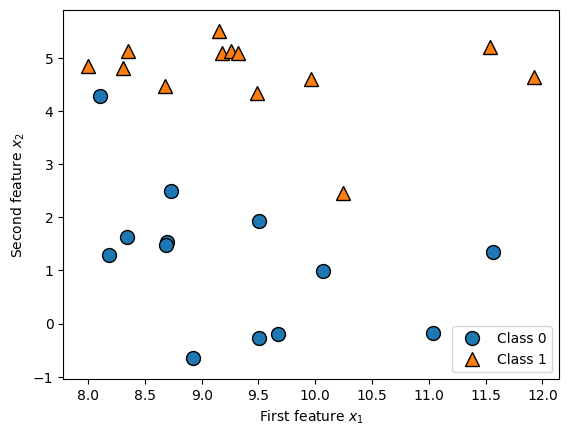

In [8]:
#plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature $x_1$")
plt.ylabel("Second feature $x_2$")
print("X.shape: {}".format(X.shape))

As you can see from X.shape, this dataset consists of 26 data points, with 2 features. The k-Nearest Neighbors (kNN) algorithm is arguably the simplest machine learning algorithm. Building the model only consists of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset, its “nearest neighbors”.

In its simplest version, the algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.

The prediction is then simply the known output for this training point. Figure forge_one_neighbor illustrates this for the case of classification on the forge dataset.


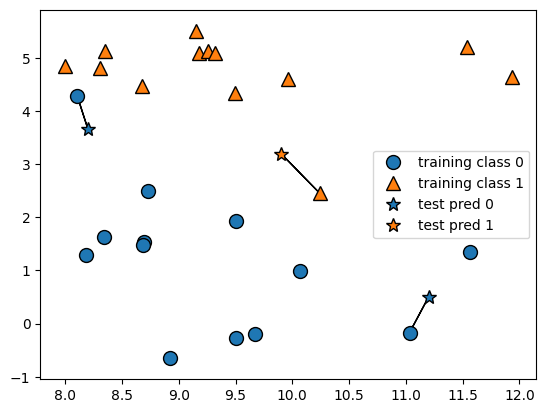

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as crosses. For each of them, we marked the closest point in the training set. The prediction of the one-nearest neighbor algorithm is the label of that point (shown by the color of the star).

Instead of considering only the closest neighbor, we can also consider an arbitrary number $k$ of neighbors. This is where the name of the $k$ neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label.

This means, for each test point, we count how many neighbors are red, and how many neighbors are blue. We then assign the class that is more frequent: in other words, the majority class among the $k$ neighbors.

Below is an illustration using the three closest neighbors. Again, the prediction is shown as the color of the cross. You can see that the prediction changed for the point in the top left from using only one neighbor.

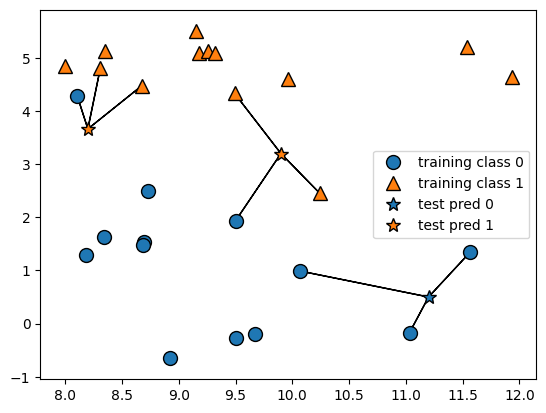

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

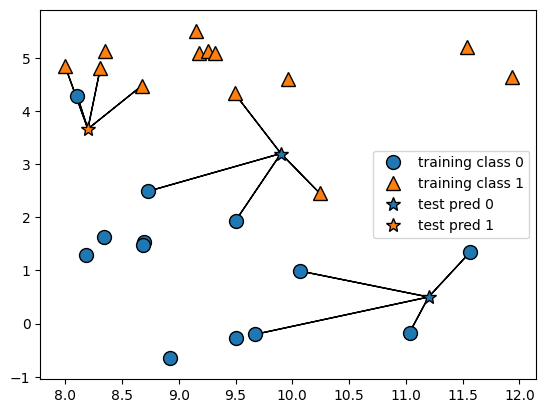

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

While this illustration is for a binary classification problem, you can imagine this working with any number of classes. For more classes, we count how many neighbors belong to each class, and again predict the most common class.

Now let’s look at how we can apply the $k$ nearest neighbors algorithm using `scikit-learn`. First, we split our data into a training and a test set, so we can evaluate generalization performance, default is 75:25. This will be expounded again in our Example 1 below.

In [12]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge() #Here is the data, we can get this from excel sheet or SQL

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) #split into train =75%, test =25%

Next we import and instantiate the class. This is when we can set parameters, like the
number of neighbors to use. Here, we set it to three.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) #Parameter for kNN

Now, we fit the classifier using the training set. For `KNeighborsClassifier` this means storing the dataset, so we can compute neighbors during prediction.

In [14]:
clf.fit(X_train, y_train) #Fit the data

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


To make predictions on the test data, we call the predict method. This computes the
nearest neighbors in the training set and finds the most common class among these. Let's look at the test set first:

In [15]:
X_train

array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

In [16]:
X_test

array([[11.54155807,  5.21116083],
       [10.06393839,  0.99078055],
       [ 9.49123469,  4.33224792],
       [ 8.18378052,  1.29564214],
       [ 8.30988863,  4.80623966],
       [10.24028948,  2.45544401],
       [ 8.34468785,  1.63824349]])

In [17]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:

In [18]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
print("Train set accuracy: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Train set accuracy: 0.95
Test set accuracy: 0.86


We see that our model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset.

## Analyzing kNN Classifier

For two-dimensional datasets, we can also illustrate the prediction for all possible test point in the xy-plane. We color the plane red in regions where points would be assigned the red class, and blue otherwise. This lets us view the decision boundary, which is the divide between where the algorithm assigns class red versus where it
assigns class blue.

Here is a visualization of the decision boundary for one, three and five neighbors:

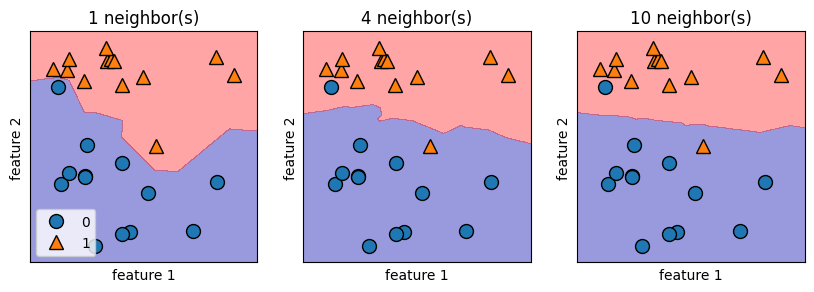

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 4, 10], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")
axes[0].legend(loc=3)

pass

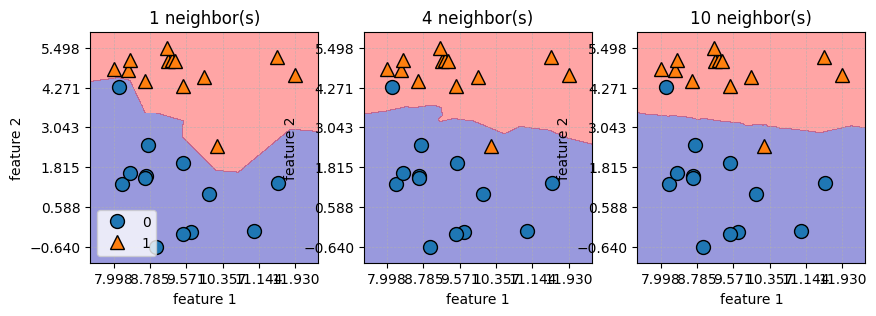

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 4, 10], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")

    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    ax.tick_params(labelbottom=True, labelleft=True)

    # optional: force ticks so values are easy to read
    ax.set_xticks(np.linspace(X[:, 0].min(), X[:, 0].max(), 6))
    ax.set_yticks(np.linspace(X[:, 1].min(), X[:, 1].max(), 6))

axes[0].legend(loc=3)
plt.show()

As you can see in the left figure, using a single neighbor results in a decision boundary
that follows the training data closely. Considering more and more neighbors leads
to a smoother decision boundary. A smoother boundary corresponds to a simple
model.     

**In other words, using fewer neighbors corresponds to higher model complexity (as shown on the right side of Figure `model_complexity`), and using many neighbors corresponds to lower model complexity.**


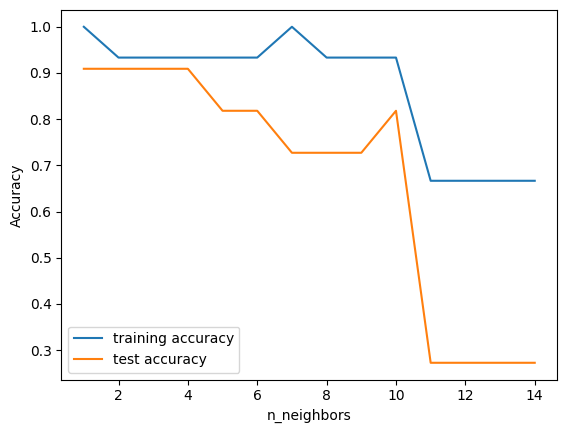

In [19]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=1)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

<div class="alert alert-block alert-info">

## ⚠️ Checkpoint ⚠️

In the next 5-10 minutes, discuss these concepts with your LT to check your understanding:
1. What is the difference between **Classification** and **Regression**?
2. How does kNN work?
3. What is the primary hyperparameter of kNN?
</div>

# Example 1. Iris Flower Classification
---

Let’s assume that a hobby botanist is interested in distinguishing what the species is of
some iris flowers that she found. She has collected some measurements associated
with the iris: the length and width of the petals, and the length and width of the sepal,
all measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species Setosa, Versicolor or Virginica. For
these measurements, she can be certain of which species each iris belongs to. Let’s
assume that these are the only species our hobby botanist will encounter in the wild.
Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

![Iris](https://user-images.githubusercontent.com/25600601/114910229-36450f80-9e50-11eb-9df8-4dfe8e17b936.png)
https://morioh.com/p/eafb28ccf4e3

Since we have measurements for which we know the correct species of iris, this is a
supervised learning problem. In this problem, we want to predict one of several
options (the species of iris). This is an example of a classification problem. The possible
outputs (different species of irises) are called classes.
Since every iris in the dataset belongs to one of three classes this problem is a threeclass
classification problem.

The desired output for a single data point (an iris) is the species of this flower. For a
particular data point, the species it belongs to is called its label.

**Meet the data**

The data we will use for this example is the iris dataset, a classical dataset in machine
learning an statistics.
It is included in scikit-learn in the dataset module. We can load it by calling the
load_iris function:

In [20]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [21]:
df=pd.DataFrame.from_dict(iris_dataset['data']) #Feature variables
df.columns=iris_dataset['feature_names'] #ADD the feature_names as column labels
df['Target'] = iris_dataset['target'] #ADD the target as another column
df #DISPLAY the first five rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


We see that the data contains measurements for 150 different flowers.
Remember that the individual items are called **samples** in machine learning, and their
properties are called **features**.  The **shape** of the data array is the number of samples times the number of features.

This is a convention in $sklearn$ (scikit-learn), and your data will always be assumed to be in this shape.

Here are the feature values for the first five samples:


From this data, we can see that all of the first ten flowers have a petal width of 0.1 to 0.4 cm and that the sixth flower has the longest sepal, at 5.4 cm. The target array contains the species of each of the flowers that were measured. The target is a one-dimensional array, with one entry per flower. The meaning of the numbers are given by the iris['target_names'] array:  
   
0 means *Setosa*,     
1 means *Versicolor*, and     
2 means *Virginica*

### Measuring Success: Training and Testing Data

We want to build a machine learning model from this data that can predict the species
of iris for a new set of measurements. Before we can apply our model to new measurements, we need to know whether our model actually works, that is whether we should trust its predictions.

Unfortunately, we can not use the data we use to build the model to evaluate it. This is
because our model can always simply remember the whole training set, and will
therefore always predict the correct label for any point in the training set. This
“remembering” does not indicate to us whether our model will generalize well, in
other words whether it will also perform well on new data. So before we apply our
model to new measurements, we will want to know whether we can trust its predictions.
To assess the models’ performance, we show the model new data (that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data we
have collected (here our 150 flower measurements) into two parts.
The part of the data is used to build our machine learning model, and is called the
training data or training set. The rest of the data will be used to access how well the
model works and is called test data, test set or hold-out set.
Scikit-learn contains a function that shuffles the dataset and splits it for you, the
train_test_split function.

This function extracts 75% of the rows in the data as the training set, together with
the corresponding labels for this data. The remaining 25% of the data, together with
the remaining labels are declared as the test set.
How much data you want to put into the training and the test set respectively is
somewhat arbitrary, but using a test-set containing 25% of the data is a good rule of
thumb.
In scikit-learn, data is usually denoted with a capital X, while labels are denoted by a
lower-case y.
Let’s call train_test_split on our data and assign the outputs using this nomenclature:

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.25,
random_state=0)

The train_test_split function shuffles the dataset using a pseudo random number generator before making the split. If we would take the last 25% of the data as a test set, all the data point would have the label 2, as the data points are sorted by the label (see the output for iris['target'] above). Using a tests set containing only one of
the three classes would not tell us much about how well we generalize, so we shuffle our data, to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several times, we provide the pseudo random number generator with a fixed seed using the random_state parameter. This will make the outcome deterministic, so this line will always have the same outcome. We will always fix the random_state in this way when using randomized procedures.

The output of the train_test_split function are X_train, X_test, y_train and y_test, which are all numpy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%:

In [23]:
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
Y_train shape: (112,)


In [24]:
print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
Y_test shape: (38,)


### Pair Plot: A first look at the data

Before building a machine learning model, it is often a good idea to inspect the data,
to see if the task is easily solvable without machine learning, or if the desired information
might not be contained in the data.

Additionally, inspecting your data is a good way to find abnormalities and peculiarities.
Maybe some of your irises were measured using inches and not centimeters, for
example. In the real world, inconsistencies in the data and unexpected measurements
are very common.

One of the best ways to inspect data is to visualize it. One way to do this is by using a
scatter plot. A scatter plot of the data puts one feature along the x-axis, one feature along the yaxis,
and draws a dot for each data point.
Unfortunately, computer screens have only two dimensions, which allows us to only
plot two (or maybe three) features at a time. It is difficult to plot datasets with more
than three features this way.
One way around this problem is to do a pair plot, which looks at all pairs of two features.
If you have a small number of features, such as the four we have here, this is
quite reasonable. You should keep in mind that a pair plot does not show the interaction
of all of features at once, so some interesting aspects of the data may not be
revealed when visualizing it this way.
Here is a pair plot of the features in the training set. The data points are colored
according to the species the iris belongs to.



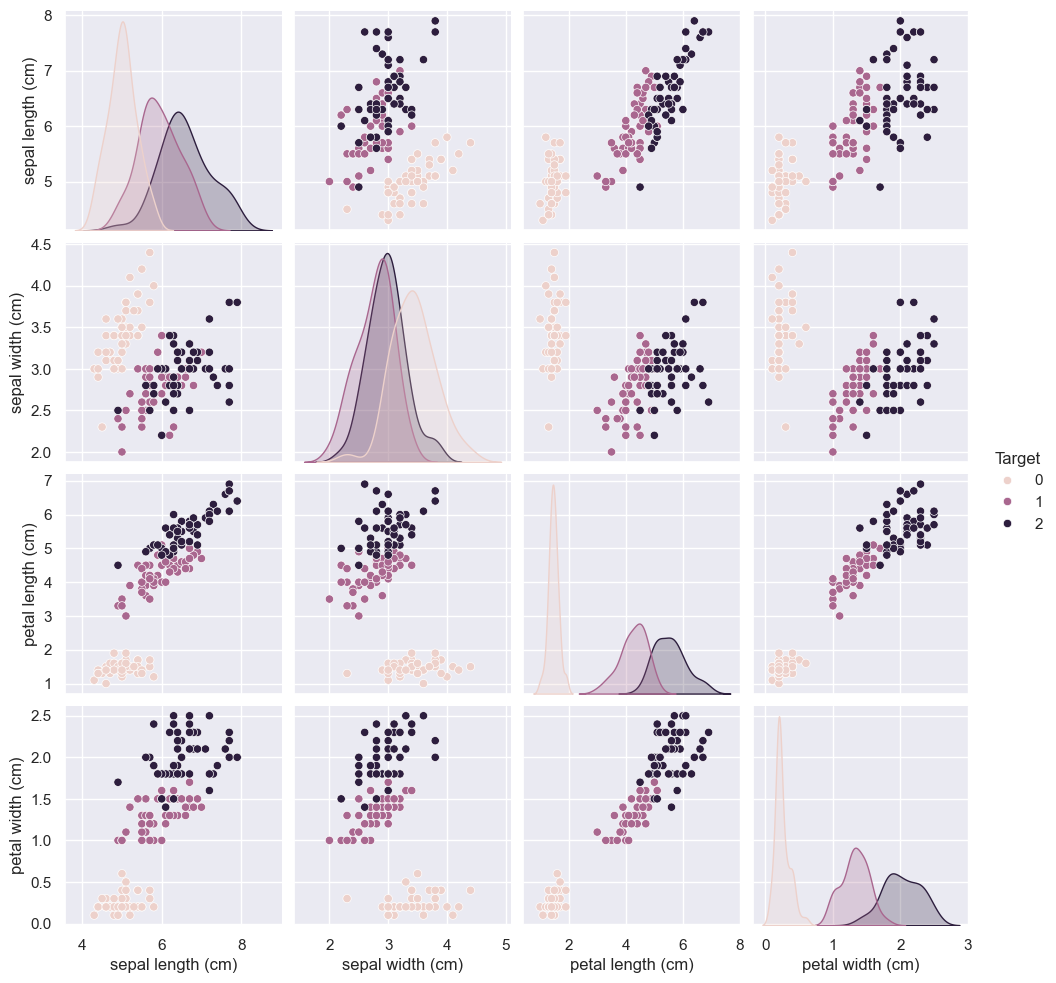

In [25]:
import seaborn as sns
sns.set(style="darkgrid") #whitegrid, ticks  #df = sns.load_dataset("iris")
df=pd.DataFrame.from_dict(iris_dataset['data']) #Feature variables
df.columns=iris_dataset['feature_names'] #ADD the feature_names as column labels
df['Target'] = iris_dataset['target'] #ADD the target as another column
#df.head(10) #DISPLAY the first ten rows   #df=iris_dataset
sns.pairplot(df, hue="Target");

Building this model only consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then, it and assigns the label of this closest data training point to the new data point.

All machine learning models in scikit-learn are implemented in their own class, which are called Estimator classes. The k nearest neighbors classification algorithm is implemented in the KNeighborsClassifier class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is
when we will set any parameters of the model. The single parameter of the *KNeighborsClassifier* is the number of neighbors, which we will set to one:

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The knn object encapsulates the algorithm to build the model from the training data,
as well the algorithm to make predictions on new data points.
It will also hold the information the algorithm has extracted from the training data.
In the case of KNeighborsClassifier, it will just store the training set.
To build the model on the training set, we call the fit method of the knn object,
which takes as arguments the numpy array X_train containing the training data and
the numpy array y_train of the corresponding training labels:

In [27]:
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Making predictions
We can now make predictions using this model on new data, for which we might not
know the correct labels.

Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of
2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would
this be?

We can put this data into a numpy array, again with the shape number of samples
(one) times number of features (four):


In [28]:
X_new = np.array([[5, 2.9, 8, 0.2]])
X_new.shape

(1, 4)

To make prediction we call the predict method of the knn object:

In [29]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


Our model predicts that this new iris belongs to the class 2, meaning its species is
Virginica.
But how do we know whether we can trust our model? We don’t know the correct
species of this sample, which is the the whole point of building the model!

### Evaluating the model

This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species are for each iris in the test
set.
We can make a prediction for an iris in the test data, and compare it against its label
(the known species). We can measure how well the model works by computing the
accuracy, which is the fraction of flowers for which the right species was predicted:

In [30]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [31]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


We can also use the score method of the knn object, which will compute the test set
accuracy for us:

In [32]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. Under some mathematical assumptions,
this means that we can expect our model to be correct 97% of the time for new
irises.
For our hobby botanist application, this high level of accuracy means that our models
may be trustworthy enough to use. In later chapters we will discuss how we can
improve performance, and what caveats there are in tuning a model.

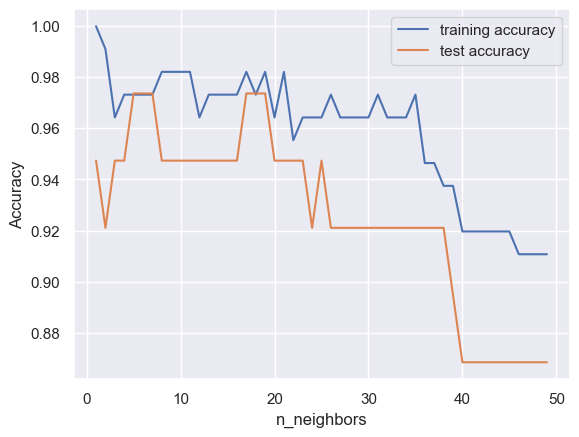

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.25,
random_state=143)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

Let's run 50 trials to see the real trend of Accuracy as a function of n_neighbors:

In [34]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1, 50, 1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                        test_size=0.25,random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy

    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy

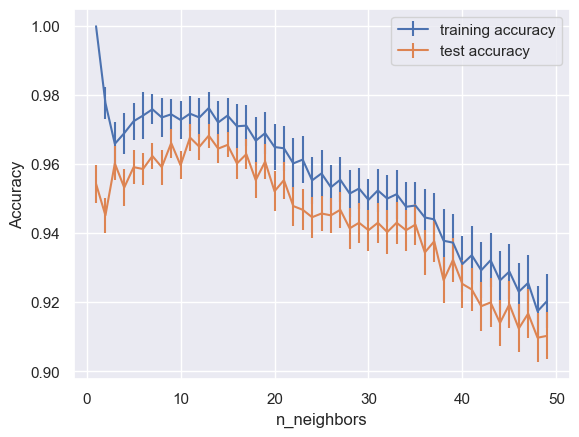

In [35]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [36]:
mean_test = lahat_test.mean(axis=1)
best_idx = np.argmax(mean_test)
best_k = neighbors_settings[best_idx]

print(f"Best k: {best_k}, test accuracy: {mean_test[best_idx]:.4f}")

Best k: 13, test accuracy: 0.9683


### Summary
Let's summarize what we learned in this example.

- <u>Step 1: Start with the question</u>. We started off formulating a task of
predicting which species of iris a particular flower belongs to by using physical measurements
of the flower.

- <u>Step 2: Prepare Data</u>. We used a dataset of measurements that was annotated by an expert with the correct species to build our model, making this a supervised learning task. There were three possible species, Setosa, Versicolor or Virginica, which made the task a three-class classification problem. The possible species are called classes in the classification problem, and the species of a single iris is called its label. The dataset consists of two numpy arrays, one containing the data, which is referred to as X in scikit-learn, and one containing the correct or desired outputs, which is called y. The array X is a two-dimensional array of features, with one row per data point, and one column per feature. The array y is a one-dimensional array, which here contained one class label from 0 to 2 for each of the samples. We split our dataset into a training set, to build our model, and a test set, to evaluate how well our model will generalize to new, unseen data.

- <u>Step 3: Tune the model parameters</u>. We chose the k nearest neighbors classification algorithm, which makes predictions
for a new data point by considering its closest neighbor(s) in the training set. The algorithm is implemented in the `KNeighborsClassifier` class, which contains the algorithm to build the model, as well as the algorithm to make a prediction using the model. We instantiated the class, setting parameters. Then, we built the model by calling the fit method, passing the training data X_train and training outputs y_train as parameters.

- <u>Step 4: Evaluate the model</u>. We evaluated the model using the score method, that computes the accuracy of the
model. We applied the score method to the test set data and the test set labels, and found that our model is about 97% accurate, meaning it is correct 97% of the time on the test set. This gave us the confidence to apply the model to new data (in our example, new flower measurements), and trust that the model will be correct about 97% of the time.

**Here is a summary of the code needed for the whole training and evaluation procedure:**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


This snippet contains the core code for applying any machine learning algorithms using scikit-learn. The fit, predict and score methods are the common interface to supervised models in *sklearn* (scikit-learn), and with the concepts introduced in this chapter, you can apply these models to many machine learning tasks.

In the next chapter, we will go into more depth about the different kinds of supervised models in scikit-learn, and how to apply them successfully.

<div class="alert alert-block alert-info">

## ⚠️ Checkpoint ⚠️

The above code snippet is critical. This is the general template you have whenever you want to run a basic machine learning model.
</div>

# Example 2. Boston Cancer Dataset
---

Wisconsin breast cancer dataset (or cancer for
short, read `cancer.DESC` if you want to learn more), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

The data can be loaded using the `load_breast_cancer` from scikit-learn. Datasets that are included in scikit-learn are usually stored as Bunch objects, which contain some information about the dataset as well as the actual data.

All you need to know about Bunch objects is that they behave like dictionaries, with the added benefit that you can access values using a dot (as in `bunch.key` instead of
`bunch['key']`).

## Validation Sets
Having a validation set is important in Machine Learning as it helps us prevent overfitting. We will discuss this in more detail in later lecture on **Model Evaluation**.

1. **3-way Split**: Involves three separate sets for training, validation, and testing. It is useful when there is a sufficient amount of data, and the validation set is needed to tune the model's hyperparameters.
2. **Cross-validation**: Does not have a separate validation set; instead, it repeatedly splits the data into training and testing sets. It is useful when the dataset is limited, as it allows for a more robust estimation of the model's performance. Here we cover two types of cross-validation methods that are commonly used: **Monte Carlo** and **k-fold**.

In [38]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer_dataset.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [39]:
print("cancer.DESCR:\n{}".format(cancer_dataset.DESCR))

cancer.DESCR:
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst R

In [40]:
df=pd.DataFrame.from_dict(cancer_dataset['data']) #Feature variables
df.columns=cancer_dataset['feature_names'] #ADD the feature_names as column labels
df['Target'] = cancer_dataset['target'] #ADD the target as another column
df.head(-10) #DISPLAY the first five rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242,1
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283,1
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742,1
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969,1


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'], cancer_dataset['target'],test_size=0.25)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

print("Test set predictions:\n {}".format(y_pred))
knn.score(X_test,y_test)

Test set score: 0.92
Test set predictions:
 [1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1]


0.916083916083916

In [44]:
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'],cancer_dataset['target'],
                                                    test_size=0.25,random_state=20)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train) #decision boundaries stored here

print("train accuracy= ", knn.score(X_train, y_train))
print("test accuracy =", knn.score(X_test,y_test))

train accuracy=  0.9413145539906104
test accuracy = 0.9230769230769231


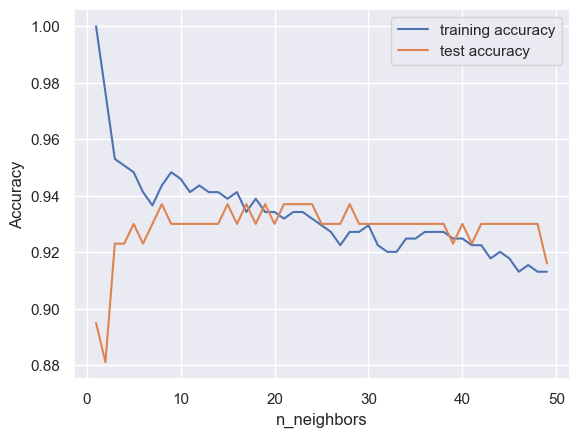

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'],cancer_dataset['target'],
                                                    test_size=0.25,random_state=20)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

### **Method 1:** Monte Carlo Cross Validation (MCCV)

In [ ]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1, 20, 1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'],cancer_dataset['target'],
                                                        test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy

    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

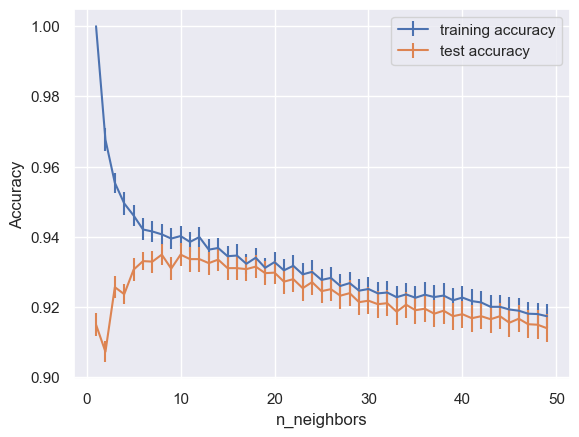

In [47]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Based on these results, one would choose the following hyperparameter:

In [48]:
print("Best test set mean accuracy: {:.2f}%".format(lahat_test.mean(axis = 1).max() * 100))
print("For k = {}".format(lahat_test.mean(axis = 1).argmax() + 1))

Best test set mean accuracy: 93.49%
For k = 8


### **Method 2:** 3-way Split
Illustration of the 60-20-20 **train/validation/test** split.

In [49]:
# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'], cancer_dataset['target'], test_size=0.2, random_state=1337)

# Split the training set into a training set (60%) and a validation set (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1337)

# Sanity check: dimensionality of dataset splits
print("Complete dataset: {}".format(cancer_dataset['data'].shape))
print("Training set: {}".format(X_train.shape))
print("Validation set: {}".format(X_val.shape))
print("Test set: {}".format(X_test.shape))

Complete dataset: (569, 30)
Training set: (341, 30)
Validation set: (114, 30)
Test set: (114, 30)


Now let us apply this over several trials.

In [50]:
lahat_training = pd.DataFrame()
lahat_val = pd.DataFrame()
lahat_test = pd.DataFrame()

for seedN in range(1, 50, 1):
    from sklearn.model_selection import train_test_split

    # Split the data into a training set (80%) and a test set (20%)
    X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'], cancer_dataset['target'], test_size=0.2, random_state=seedN)

    # Split the training set into a training set (60%) and a validation set (20%)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seedN)

    training_accuracy = []
    val_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        val_accuracy.append(clf.score(X_val, y_val)) # record validation set accuracy
        test_accuracy.append(clf.score(X_test, y_test)) # record generalization accuracy

    lahat_training[seedN] = training_accuracy
    lahat_val[seedN] = val_accuracy
    lahat_test[seedN] = test_accuracy

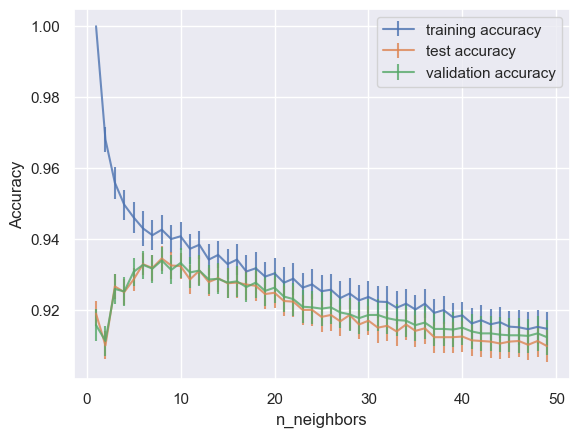

In [51]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy", alpha = 0.8)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy", alpha = 0.8)
plt.errorbar(neighbors_settings, lahat_val.mean(axis=1),
             yerr=lahat_val.std(axis=1)/6, label="validation accuracy", alpha = 0.8)
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Based on these results, one would choose the following hyperparameter:

In [52]:
best_val_k = lahat_val.mean(axis = 1).argmax() + 1
print("Best validation set mean accuracy: {:.2f}%".format(lahat_val.mean(axis = 1).max() * 100))
print("For k = {}".format(best_val_k))
print("Mean performance on test set of k = {}: {:.2f}%".format(best_val_k, lahat_test.mean(axis = 1)[best_val_k] * 100))

Best validation set mean accuracy: 93.39%
For k = 8
Mean performance on test set of k = 8: 93.25%


In [53]:
print("Best test set mean accuracy: {:.2f}%".format(lahat_test.mean(axis = 1).max() * 100))
print("For k = {}".format(lahat_test.mean(axis = 1).argmax() + 1))

Best test set mean accuracy: 93.45%
For k = 8


### **Method 3:** k-fold Cross-validation
There is **no explicit validation set** in k-fold cross-validation.

Compared to Method 0, cross-validation is more robust and provides a more reliable estimate of the model's performance as it ensures that **each data point is used for both training and testing**.



In [54]:
from sklearn.model_selection import KFold

# we define k-fold Cross-validation with 10 folds
number_folds = 10
kf = KFold(n_splits=number_folds, shuffle=True, random_state=1337)

In [55]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
fold = 0

X = cancer_dataset['data']
y = cancer_dataset['target']

# Compared to Method 0, this line is the only difference.
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy

    lahat_training[fold] = training_accuracy
    lahat_test[fold] = test_accuracy
    fold += 1

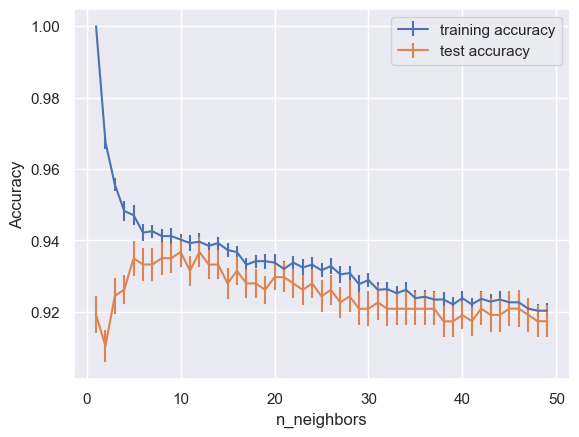

In [56]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/8, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Based on these results, one would choose the following hyperparameter:

In [57]:
print("Best test set mean accuracy: {:.2f}%".format(lahat_test.mean(axis = 1).max() * 100))
print("For k = {}".format(lahat_test.mean(axis = 1).argmax() + 1))

Best test set mean accuracy: 93.68%
For k = 10


# Example 3. University of the Philippines College Admission Test  (UPCAT) Prediction
---

Given here are actual class performance of 100 students of a school based in Metro Manila who took the UPCAT. UPCAT is the most competitive college entrance exam in the Philippines. Information contains the grades of each of the students in English, Math, Science together with their general weighted averages from grades 7-9. An IQ test conducted by the school is also made available together with a confidentially measured variable abbreviated as SA.  Explore how accurate can k-NN forecast UPCAT passers (pass=1, fail=0) and what is the optimal nearest-neighbor parameter. In 2020 due to the COVID 19 pandemic, UPCAT is changed to  UPCA as the "Test" is removed and the passing algorithm was derived solely on the grades and ``competitive index'' of the school.

A. Make a scatter matrix of the features.

B. Use kNN and comment on the optimal choice of **n_neighbors**.

C. Tell a story about the system: predictability, value of the result(s), or any interesting ideas.


### Load Data from Google Drive

In [58]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
data_dir = "/content/drive/MyDrive/Machine Learning Notebooks/data/"

In [ ]:
import os
os.listdir(data_dir)

['UPCAT_DATA2.xlsx', 'parkinsons_updrs.xlsx', 'Bike_Sharing.xlsx']

In [ ]:
df_UPCAT = pd.read_excel(data_dir+'UPCAT_DATA2.xlsx', sheet_name="100")
dummy=df_UPCAT
df_UPCAT.head(8)

,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,IQ,SA,Target
0,77,82,86,94,87,92,84,80,92,1.4764,1.5045,1.4098,55,28,1
1,57,57,59,55,46,57,53,45,53,2.6557,2.7000,2.7008,38,19,0
2,55,52,55,57,53,51,57,62,51,2.6132,2.6818,2.7172,17,9,0
3,69,78,78,87,79,79,83,82,79,1.7217,1.6136,1.7049,45,28,0
4,64,71,68,71,57,54,60,59,55,2.4245,2.4318,2.4713,67,56,0
5,66,61,68,57,50,53,71,51,55,2.4575,2.5909,2.4672,79,13,0
6,73,82,77,90,82,74,77,77,68,1.7594,1.6682,1.9344,89,67,1
7,85,86,88,82,76,78,93,87,81,1.4764,1.4682,1.5000,94,55,1


In [ ]:
df_features=dummy.drop('Target', axis=1) #Remove the Target
len(df_features)
df_features.head(8)

,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,IQ,SA
0,77,82,86,94,87,92,84,80,92,1.4764,1.5045,1.4098,55,28
1,57,57,59,55,46,57,53,45,53,2.6557,2.7000,2.7008,38,19
2,55,52,55,57,53,51,57,62,51,2.6132,2.6818,2.7172,17,9
3,69,78,78,87,79,79,83,82,79,1.7217,1.6136,1.7049,45,28
4,64,71,68,71,57,54,60,59,55,2.4245,2.4318,2.4713,67,56
5,66,61,68,57,50,53,71,51,55,2.4575,2.5909,2.4672,79,13
6,73,82,77,90,82,74,77,77,68,1.7594,1.6682,1.9344,89,67
7,85,86,88,82,76,78,93,87,81,1.4764,1.4682,1.5000,94,55


In [ ]:
df_features.iloc[5]

Eng7     66.0000
Eng8     61.0000
Eng9     68.0000
Math7    57.0000
Math8    50.0000
Math9    53.0000
Sci7     71.0000
Sci8     51.0000
Sci9     55.0000
GWA7      2.4575
GWA8      2.5909
GWA9      2.4672
IQ       79.0000
SA       13.0000
Name: 5, dtype: float64

In [ ]:
df_UPCAT['Target'].head(8)

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    1
Name: Target, dtype: int64

### Proportional Chance Criterion (PCC)
<u>Learning point</u>: How do you know your classifier is good enough? One way is to calculate the proportional chance criteria ($\mathbf{P}_{CC}$). The $\mathbf{P}_{CC}$ for $M$ possible states is given by:
    
\begin{equation}
\mathbf{P}_{CC}= (\frac{n_1}{N})^2 + (\frac{n_2}{N})^2 + \cdots + (\frac{n_M}{N})^2  
\end{equation}

where $n_M$ is the number of samples at state $M$. The $\mathbf{P}_{CC}$ also referred to as the *proportional by chance accuracy rate* computes the highest possible random chance of classifying data without explicit mathematical model other than population counts. As a heuristic or rule of thumb, a classifier machine learning model is considered highly succcesful when the test accuracy exceeds 1.25$\mathbf{P}_{CC}$.

Population per class:    0
1  44
0  56
Proportion Chance Criterion: 50.72%
1.25 * Proportion Chance Criterion: 63.40%


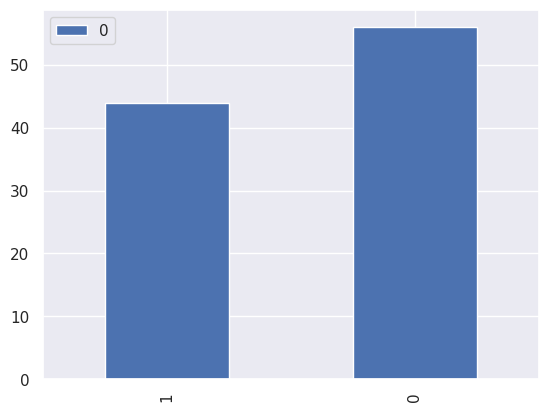

In [ ]:
import numpy as np
from collections import Counter
state_counts = Counter(df_UPCAT['Target'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

print("Population per class:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [ ]:
import seaborn as sns
sns.set(style="ticks")

df = df_UPCAT
sns.pairplot(df, hue="Target")

pass

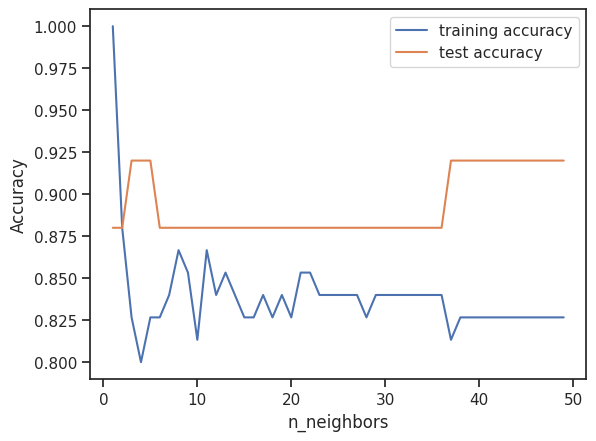

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,df_UPCAT['Target'],
                                                    test_size=0.25,random_state=42)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
    clf.fit(X_train, y_train)

    training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

Let's try to average over 50 different training and test set combinations.

In [ ]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,50,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_features,df_UPCAT['Target'],
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 70) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy

    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


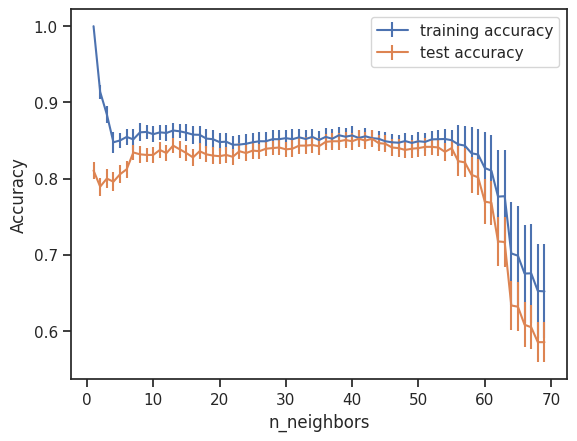

In [ ]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
np.max(lahat_test.mean(axis=1))

0.8522448979591841

Consider a new student. Let's see if he/she will pass the UPCAT entrance test.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)  # build the model
clf.fit(X_train, y_train)

X_new = np.array([[77,82,86,94,87,92,84,80,92,1.4764,1.5045,1.4098,55,28]])

In [ ]:
prediction = clf.predict(X_new)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_new = np.array([[55,52,55,57,53,51,57,62,51,2.6132,2.6818,2.7172,17,9]])
prediction = clf.predict(X_new)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Appendices
---

For those who are interested to spend more time learning about coding and how to interact with excel data. We will not discuss the items below in class, but you may want to browse on your own.

## Appendix 1: Iris Dataset
Some nice to learn programming notes. The iris object that is returned by load_iris is a Bunch object, which is very similar
to a dictionary. It contains keys and values:

In [ ]:
print("keys of iris_dataset: \n{}".format(iris_dataset.keys()))

keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The value to the key DESCR is a short description of the dataset. We show the beginning
of the description here. Feel free to look up the rest yourself.

In [ ]:
print(iris_dataset['DESCR'][:700] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== =====
...


The value with key target_names is an array of strings, containing the species of
flower that we want to predict:

In [ ]:
print("Target Names:{}".format(iris_dataset['target_names']))

Target Names:['setosa' 'versicolor' 'virginica']


The feature_names are a list of strings, giving the description of each feature:

In [ ]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The data itself is contained in the target and data fields. The data contains the
numeric measurements of sepal length, sepal width, petal length, and petal width in a
numpy array:


The rows in the data array correspond to flowers, while the columns represent the
four measurements that were taken for each flower:


In [ ]:
print("Shape of data:{}".format(iris_dataset['data'].shape))

Shape of data:(150, 4)


We see that the data contains measurements for 150 different flowers.
Remember that the individual items are called **samples** in machine learning, and their
properties are called **features**.

The **shape** of the data array is the number of samples times the number of features.

This is a convention in scikit-learn, and your data will always be assumed to be in this
shape.

Here are the feature values for the first five samples:


In [ ]:
print("First ten rows of data: \n{}".format(iris_dataset['data'][:10]))

First ten rows of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


From this data, we can see that all of the first ten flowers have a petal width of 0.1 to 0.4 cm and that the sixth flower has the longest sepal, at 5.4 cm. The target array contains the species of each of the flowers that were measured. The target is a one-dimensional array, with one entry per flower:

In [ ]:
iris_dataset['target'].shape

(150,)

The species are encoded as integers from 0 to 2:

In [ ]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Appendix 2: Iris Dataset - Basic Sensitivity Analysis

Sensitivity analysis can be performed to understand how critical the features are of a kNN classifier. Consider the illustration below.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris_dataset = datasets.load_iris()
clf = KNeighborsClassifier()

y =  iris_dataset.target
number_features = iris_dataset.data.shape[1]

print('Feature Added  Accuracy')
for i in range(number_features):
    X = iris_dataset.data[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X, y)
    print('%d        %g' % (i, scores.mean()))

Feature Added  Accuracy
0        0.68
1        0.486667
2        0.94
3        0.96


In [ ]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

These results suggest that classification is dominated by features 2 and 3. You could follow an alternative approach by removing one feature at a time and look for the accuracy.

In [ ]:
print('Feature Removed  Accuracy')
for i in range(number_features):
    X_head = np.atleast_2d(iris_dataset.data[:, 0:i])
    X_tail = np.atleast_2d(iris_dataset.data[:, i+1:])
    X = np.hstack((X_head, X_tail))
    scores = cross_val_score(clf, X, y)
    print('%d        %g' % (i, scores.mean()))

Feature Removed  Accuracy
0        0.966667
1        0.966667
2        0.96
3        0.946667


Consistent with the above you will see that features 2 and 3 gives the highest accuracy dips upon removal.

## Appendix 3: Boston Cancer Dataset
This contains some "nice to learn programming notes". The dataset consists of 569 data points, with 30 features each:

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer_dataset.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
df=pd.DataFrame.from_dict(cancer_dataset['data']) #Feature variables
df.columns=cancer_dataset['feature_names'] #ADD the feature_names as column labels
df['Target'] = cancer_dataset['target'] #ADD the target as another column
df.head(10) #DISPLAY the first five rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
print(cancer_dataset.data.shape)

(569, 30)


Of these 569 data points, 212 are labeled as malignant, and 357 as benign:

In [ ]:
print(cancer_dataset.target_names)
print(np.bincount(cancer_dataset.target))

['malignant' 'benign']
[212 357]


To get a description of the semantic meaning of each feature, we can have a look at
the feature_names attribute:

In [ ]:
cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'], cancer_dataset['target'],test_size=0.25,
random_state=0)

## Appendix 4: Boston Cancer Dataset - Deeper Exploration
Some methods below will allow you to manipulate the above data and might be useful for allowing you to have an "Excel"-like feel to better appreciate the complexity of the data.

You can select columns to visualise in scatterplot just a few features.

In [ ]:
cancer_dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
select_columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','Target']
cancer_dataset_group1 = pd.DataFrame(df, columns=select_columns) #Consider only the columns given and call it group 1
df1=cancer_dataset_group1
df1.head()

,mean radius,mean texture,mean perimeter,mean area,Target
0,17.99,10.38,122.80,1001.0,0
1,20.57,17.77,132.90,1326.0,0
2,19.69,21.25,130.00,1203.0,0
3,11.42,20.38,77.58,386.1,0
4,20.29,14.34,135.10,1297.0,0


In [ ]:
select_columns = ['worst concavity','worst smoothness', 'worst symmetry', 'worst fractal dimension','Target']
cancer_dataset_group2 = pd.DataFrame(df, columns=select_columns) #Consider only the columns given and call it group 2
df2=cancer_dataset_group2
df2.head()

,worst concavity,worst smoothness,worst symmetry,worst fractal dimension,Target
0,0.7119,0.1622,0.4601,0.11890,0
1,0.2416,0.1238,0.2750,0.08902,0
2,0.4504,0.1444,0.3613,0.08758,0
3,0.6869,0.2098,0.6638,0.17300,0
4,0.4000,0.1374,0.2364,0.07678,0


In [ ]:
cancer_dataset_group2.columns

Index(['worst concavity', 'worst smoothness', 'worst symmetry',
       'worst fractal dimension', 'Target'],
      dtype='object')

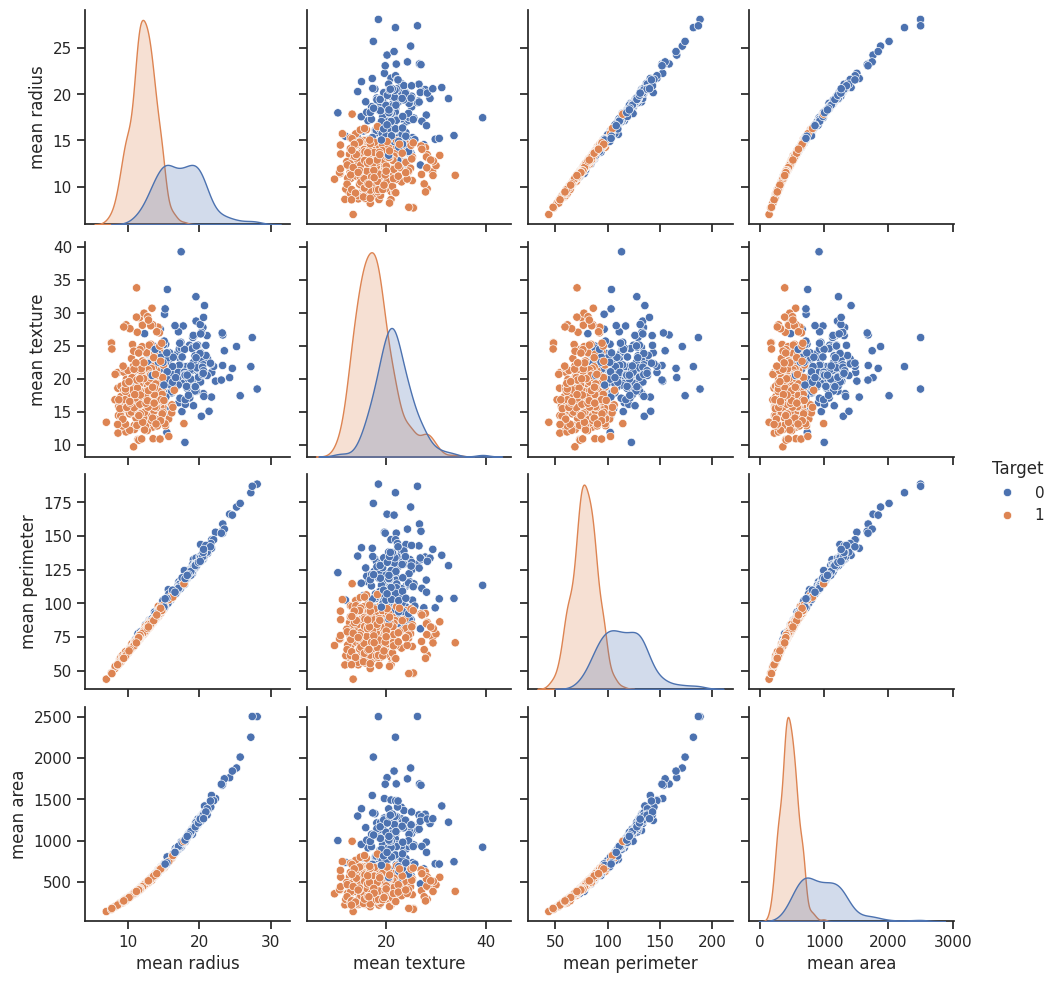

In [ ]:
import seaborn as sns
sns.set(style="ticks")

df = cancer_dataset_group1
sns.pairplot(df, hue="Target")

pass

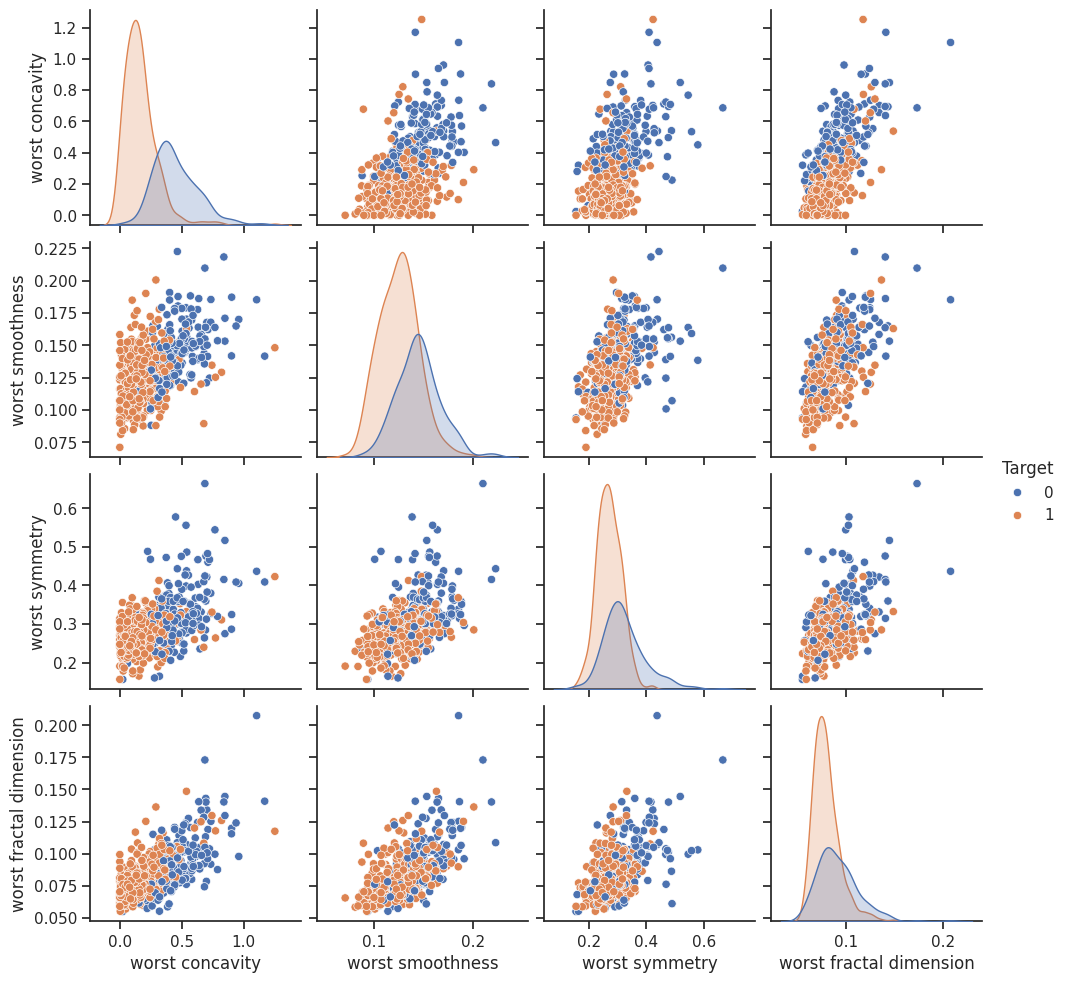

In [ ]:
import seaborn as sns
sns.set(style="ticks")

df = cancer_dataset_group2
sns.pairplot(df, hue="Target")

pass

Clearly, we can observe separation lines resulting from the features provided in this feature group. For die hard excel fans, the following commands might be useful.

In [ ]:
df.to_csv(data_dir+'ExcelDieHard.csv', sep='\t')

In [ ]:
writer = pd.ExcelWriter(data_dir+'ExcelDieHard.xlsx')
df1.to_excel(writer,'Sheet1')
df2.to_excel(writer,'Sheet2')
writer.close()

In [ ]:
df_sheet1 = pd.read_excel(data_dir+'ExcelDieHard.xlsx', sheet_name="Sheet1")
dummy=df_sheet1

In [ ]:
df_features=dummy.drop('Target', axis=1)

In [ ]:
df_features.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area
0,0,17.99,10.38,122.80,1001.0
1,1,20.57,17.77,132.90,1326.0
2,2,19.69,21.25,130.00,1203.0
3,3,11.42,20.38,77.58,386.1
4,4,20.29,14.34,135.10,1297.0


In [ ]:
df_sheet1.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,Target
0,0,17.99,10.38,122.80,1001.0,0
1,1,20.57,17.77,132.90,1326.0,0
2,2,19.69,21.25,130.00,1203.0,0
3,3,11.42,20.38,77.58,386.1,0
4,4,20.29,14.34,135.10,1297.0,0
